In [ ]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import sklearn

In [ ]:
# Loading Datasets

train = pd.read_csv('https://raw.githubusercontent.com/ArsalanSahab/Rossman-Sales-Prediction/main/train.csv')
store = pd.read_csv('https://raw.githubusercontent.com/ArsalanSahab/Rossman-Sales-Prediction/main/store.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


# CRISP-DM : Data Understanding

In [ ]:
df = df = train.merge(store, how='left', left_on=train.Store, right_on=store.Store)
df.drop(['key_0', 'Store_y'], axis=1, inplace=True)
df = df.rename(columns={'Store_x': 'Store'})




In [ ]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Displaying Shape of the combined Dataset
df.shape

(1017209, 18)

In [ ]:
'''
Rows =  1017209
Columns = 18

'''

'\nRows =  1017209\nColumns = 18\n\n'

In [ ]:
# Displaying Simple Statistics
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
# Checking for Null and Non Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

## Exploratory Data Analysis

#### Sales per Day Trend

In [ ]:
# Convert to Readable 
df.Date = pd.to_datetime(df.Date)
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year


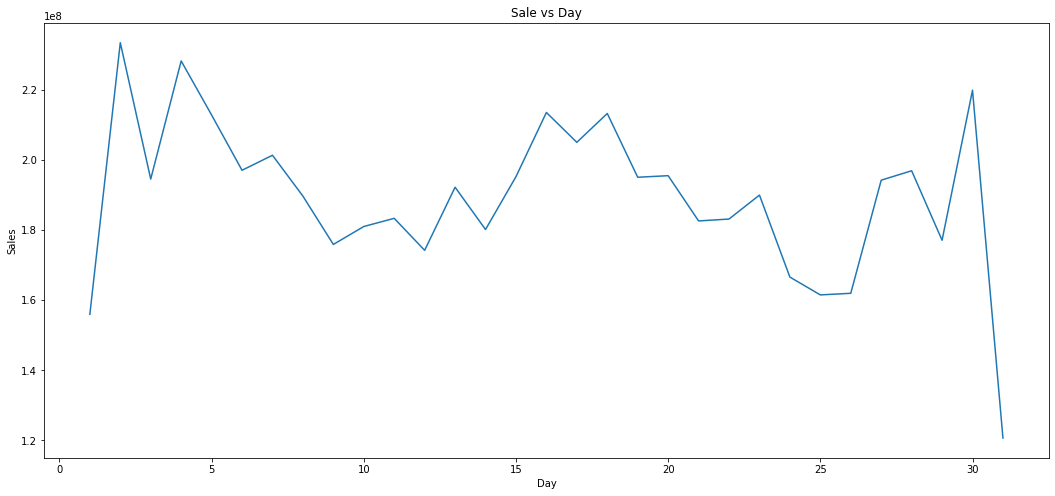

In [ ]:
# Plot Sales vs Day
plt.figure(figsize=(18, 8))
plt.plot(df.groupby(df.Day).sum().Sales)
plt.title("Sale vs Day")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()


In [ ]:
'''
Above trend shows most sales happen during the start of the month.

'''

'\nAbove trend shows most sales happen during the start of the month.\n\n'

#### Sales per Week Trend

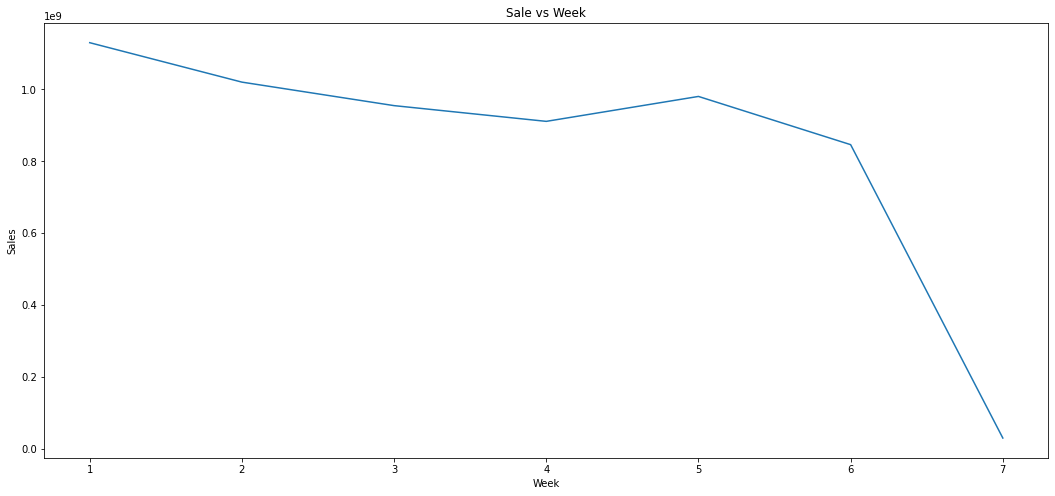

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df.groupby(df.DayOfWeek).sum().Sales)
plt.title("Sale vs Week")
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

In [ ]:
'''
More sales in startig weeks

'''

'\nMore sales in startig weeks\n\n'

#### Sales vs Month

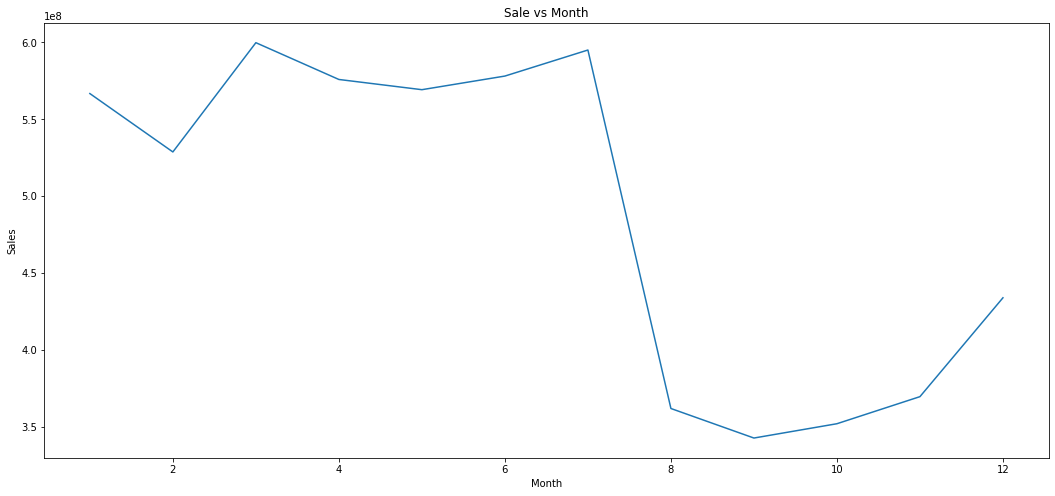

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df.groupby(df.Month).sum().Sales)
plt.title("Sale vs Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
'''
More sale in starting months, then few more in last months

'''

'\nMore sale in starting months, then few more in last months\n\n'

#### Sales Per Year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


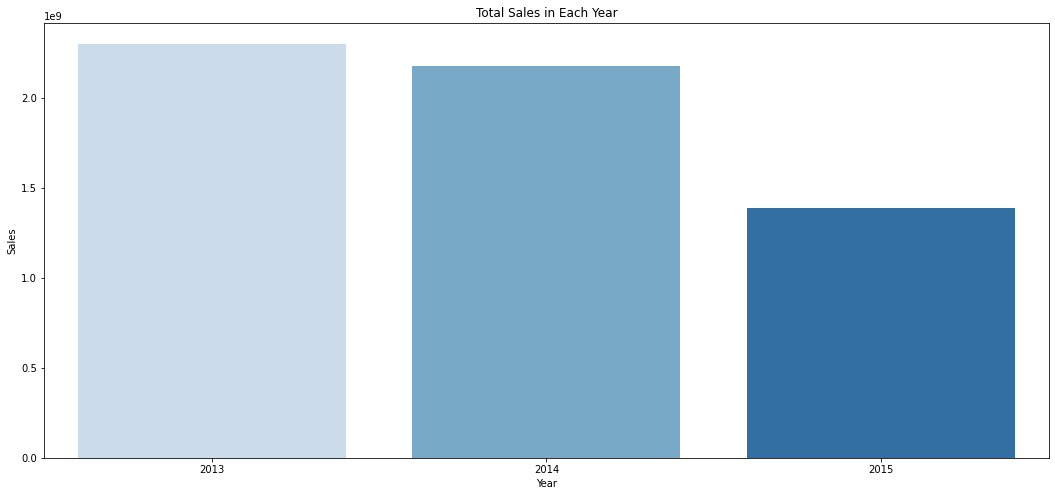

In [ ]:
plt.figure(figsize=(18, 8))
temp_df = df.groupby(df.Year).sum()
sns.barplot(temp_df.index, temp_df.Sales, palette='Blues')
plt.title("Total Sales in Each Year")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


In [ ]:
'''
Sales have been gradually decreasing each year

'''

'\nSales have been gradually decreasing each year\n\n'

#### Sales per Promo Period

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


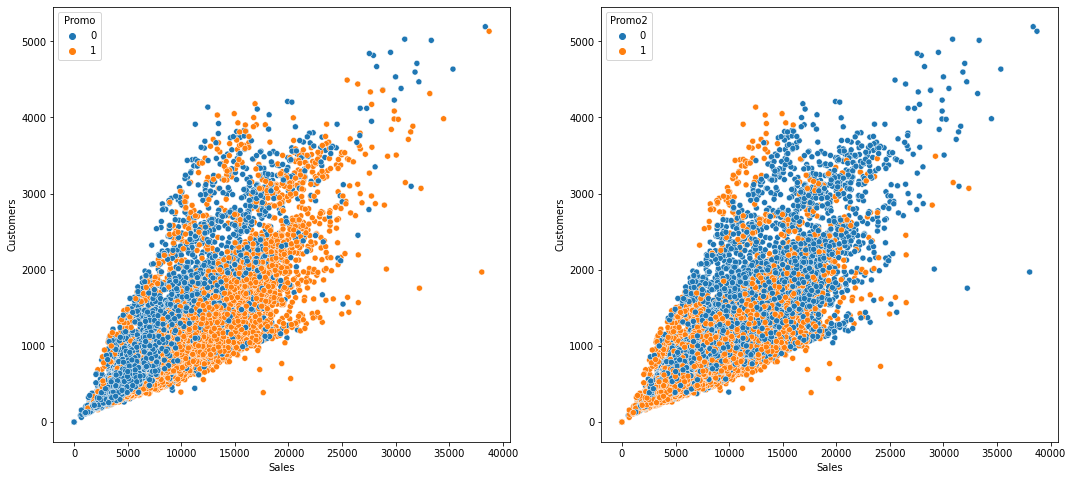

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
temp_df = df.sample(100000)
sns.scatterplot(temp_df.Sales, temp_df.Customers, hue=df.Promo, ax=ax1)
sns.scatterplot(temp_df.Sales, temp_df.Customers, hue=df.Promo2, ax=ax2)
plt.show()


In [ ]:
'''
1. Promo1 has more sales
2. Promo1 was more sucessful

'''

'\n1. Promo1 has more sales\n2. Promo1 was more sucessful\n\n'

#### Store Type vs Promo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


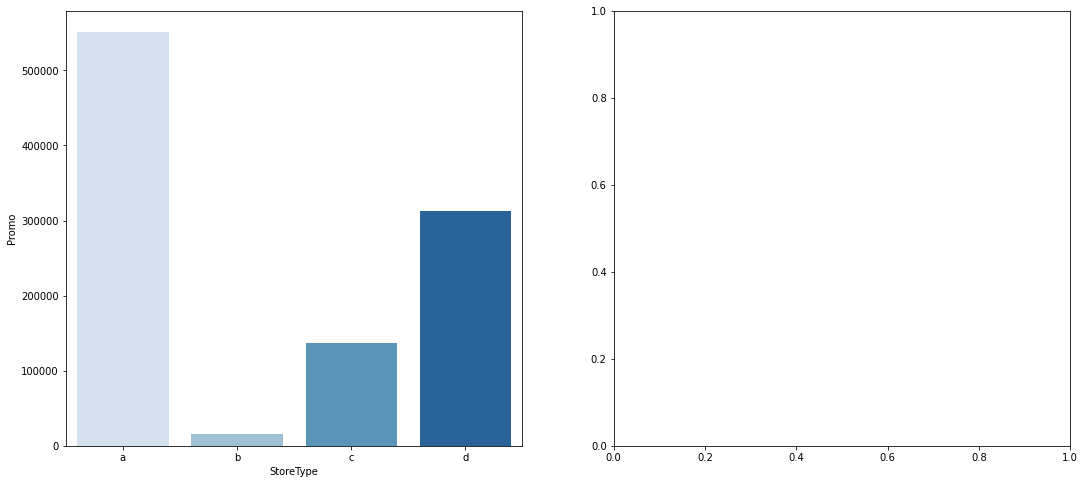

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
temp_df = df.groupby(df.StoreType).count()
sns.barplot(temp_df.index, temp_df['Promo'], ax=ax1, palette='Blues')

plt.show()


In [ ]:
'''
Store A did the most Promo'1's inspite of being on average top second in comparison to other stores

'''


"\nStore A did the most Promo'1's inspite of being on average top second in comparison to other stores\n\n"

#### State Holiday Analysis

In [ ]:
# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
df["StateHoliday"].loc[df["StateHoliday"] == 0] = "0"


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


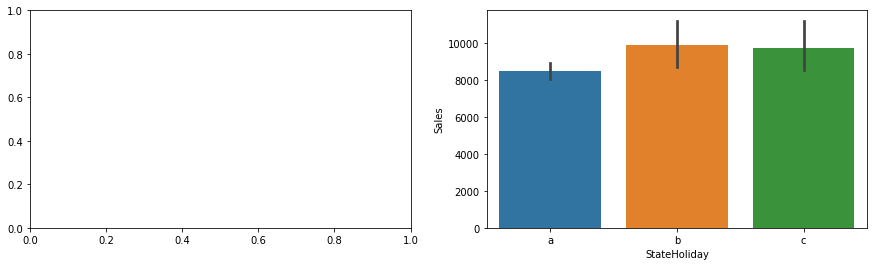

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
mask = (df["StateHoliday"] != "0") & (df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=df[mask], ax=axis2)


#### School Holiday vs Sales

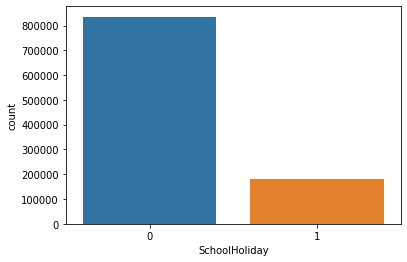

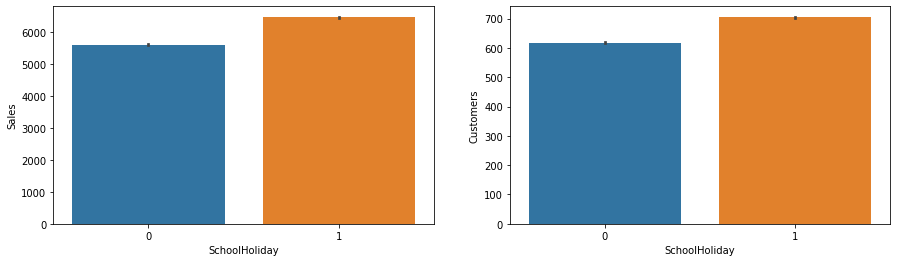

In [ ]:
sns.countplot(x='SchoolHoliday', data=df)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(x='SchoolHoliday', y='Sales', data=df, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data=df, ax=axis2)


In [ ]:
'''

1. More sales in school holidays
2. more customers in school holidays

'''

'\n\n1. More sales in school holidays\n2. more customers in school holidays\n\n'

#### Store Type vs Sales and Customers

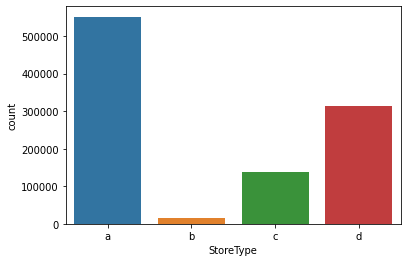

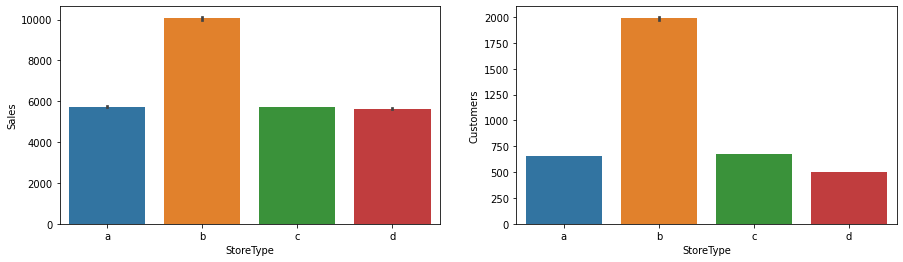

In [ ]:
sns.countplot(x='StoreType', data=df, order=['a','b','c', 'd'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StoreType', y='Sales', data=df, order=['a','b','c', 'd'],ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=df, order=['a','b','c', 'd'], ax=axis2)

In [ ]:
'''
1. Store Type B has more Sales
2. Store Type B has more Customers
3. store type a has more stores
4. store type b has least stores
'''

'\n1. Store Type B has more Sales\n2. Store Type B has more Customers\n3. store type a has more stores\n4. store type b has least stores\n'

#### Assortments vs Sales and Customers

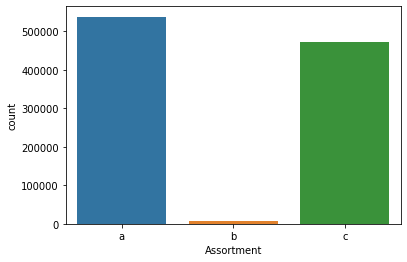

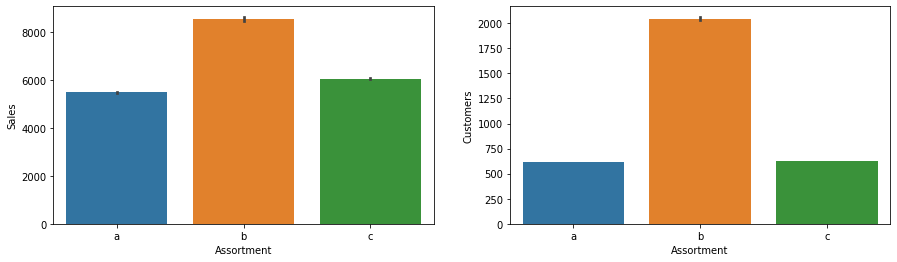

In [ ]:
sns.countplot(x='Assortment', data=df, order=['a','b','c'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=df, order=['a','b','c'], ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=df, order=['a','b','c'], ax=axis2)

In [ ]:
'''
1. assortment a has most count
2. assortment b has most sales and people

'''

'\n1. assortment a has most count\n2. assortment b has most sales and people\n\n'

#### Competiton Distance vs Sales

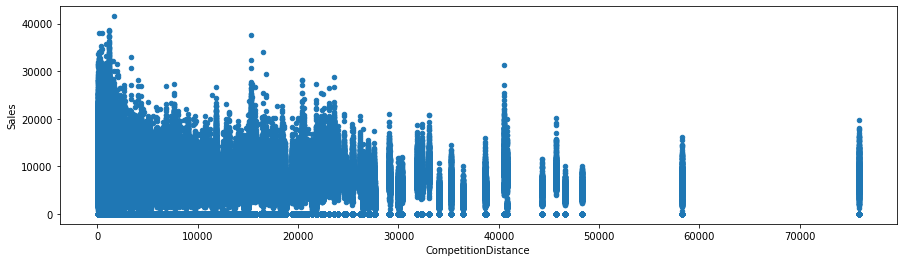

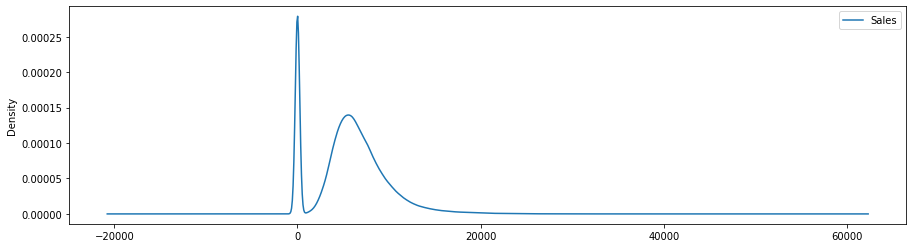

In [ ]:
df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())
df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
df.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

In [ ]:
'''
The closer the competiton the higher the density of sales

'''

'\nThe closer the competiton the higher the density of sales\n\n'

In [ ]:
def store_risk_analyis(df,store_id) :   

    # Risk Analysis
    # Analyze the risk of a store; Risk(std) Vs Expected(mean)


    store_average = df["Sales"].mean()
    store_std = df["Sales"].std()
    plt.scatter(store_average, store_std, alpha=0.5, s=np.pi*20)

    std_sales = df.groupby('Store')["Sales"].std()

    min_average = df["Sales"].min()
    max_average = df["Sales"].max()
    min_std = std_sales.min()
    max_std = std_sales.max()


    plt.ylim([min_std, max_std])
    plt.xlim([min_average, max_average])


    plt.xlabel('Expected Sales')
    plt.ylabel('Risk')

    label, x, y = "Store {}".format(store_id), store_average, store_std
    plt.annotate(
        label,
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))


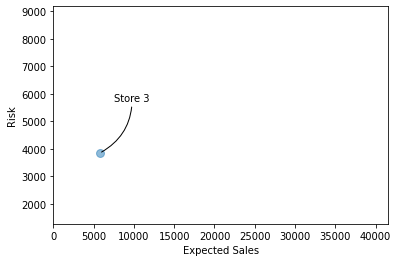

In [ ]:
# Risk Analysis for a speicifc store
store_risk_analyis(df,3)

#### Outlier Analysis

In [ ]:
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Day                                   int64
Month                                 int64
Year                                  int64
dtype: object

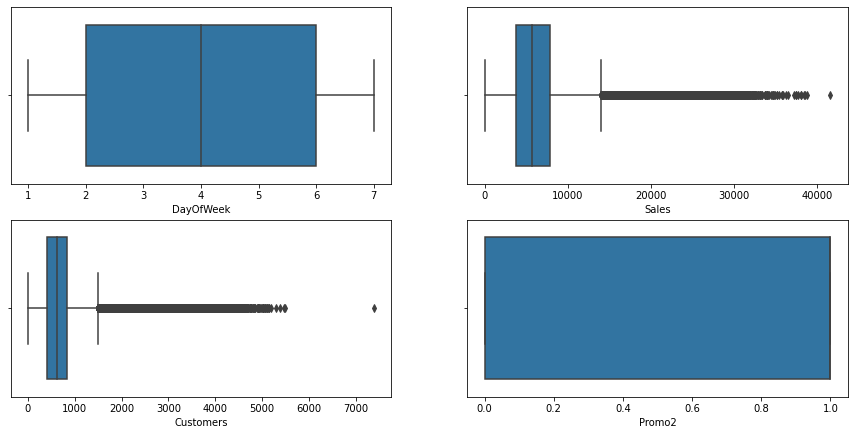

In [ ]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(['DayOfWeek', 'Sales', 'Customers', 'Promo2']):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=col, data=df)
plt.show()


In [ ]:
def z_score_removal(df, column):

    # Step 1 : Extreme Values
    high = df[column].mean() + 3*df[column].std()
    low = df[column].mean() - 3*df[column].std()

    # Step 2 : Trimming
    df_trim = df[(df[column] < high) & (df[column] > low)]

    return df_trim


In [ ]:
column_names = ['DayOfWeek', 'Sales', 'Customers', 'Promo2']

for column in column_names :
    
    df_trim = z_score_removal(df,column)

In [ ]:
df_trim

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013


#### Corelation Analysis


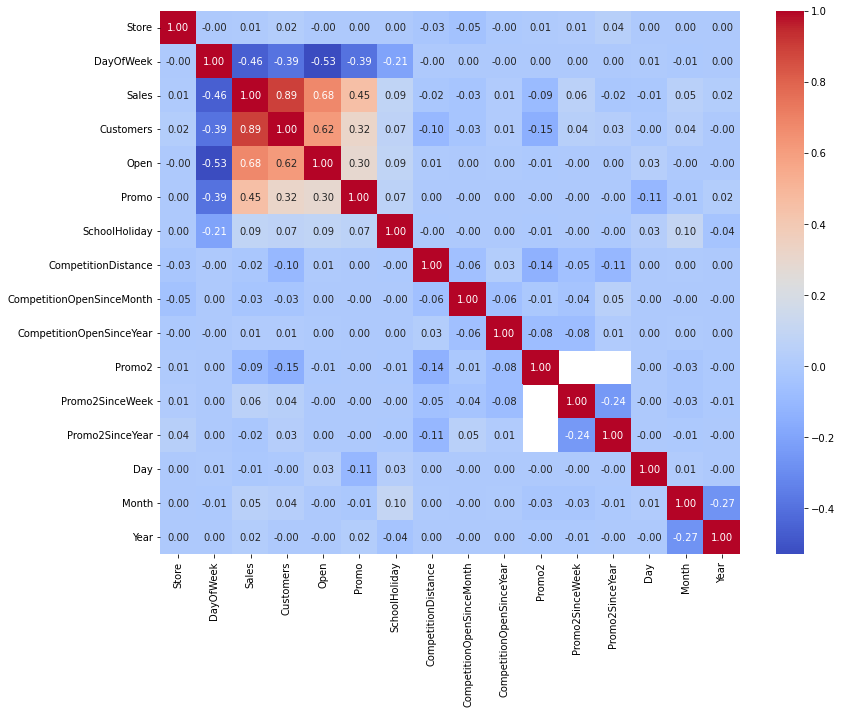

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [ ]:
'''

We can first see the 0.82 between Customers and sales which suggests that they are positively correlated.

It's interesting to see that Sales per Customer and Promo (0.28) actually correlate positively, since running a promotion increases that number .

Sales per Customer also correlates with Competition Distance(0.21), in a positive manner.

Additionally, the effect of promo2 to Sales per Customer like we said above as well(0.22), it did provoke a change in the buying pattern and increased it when continuous promotion were applied.

Finally, we can see that StoreType does play a major role with Sales per Customer (0.44).


'''

"\n\nWe can first see the 0.82 between Customers and sales which suggests that they are positively correlated.\n\nIt's interesting to see that Sales per Customer and Promo (0.28) actually correlate positively, since running a promotion increases that number .\n\nSales per Customer also correlates with Competition Distance(0.21), in a positive manner.\n\nAdditionally, the effect of promo2 to Sales per Customer like we said above as well(0.22), it did provoke a change in the buying pattern and increased it when continuous promotion were applied.\n\nFinally, we can see that StoreType does play a major role with Sales per Customer (0.44).\n\n\n"

In [ ]:
df_trim['SalesperCustomer']=df_trim['Sales']/df_trim['Customers']

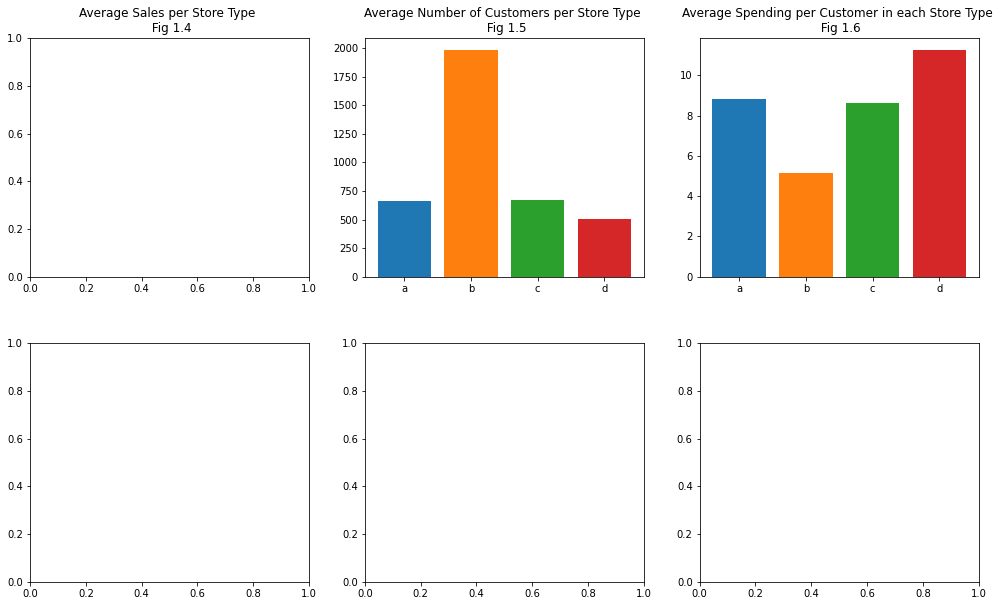

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace=0.28)

axes[0, 0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[0, 1].bar(df_trim.groupby(by="StoreType").sum().Customers.index, df_trim.groupby(
    by="StoreType").Customers.mean(), color=[next(palette), next(palette), next(palette), next(palette)])
axes[0, 1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[0, 2].bar(df_trim.groupby(by="StoreType").sum().Sales.index, df_trim.groupby(
    by="StoreType").SalesperCustomer.mean(), color=[next(palette), next(palette), next(palette), next(palette)])
axes[0, 2].set_title(
    "Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()


In [ ]:
'''

1. store type b has most customers
2. store type d has most spending per customers
'''


'\n\n1. store type b has most customers\n2. store type d has most spending per customers\n'

#### Year vs Promos

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


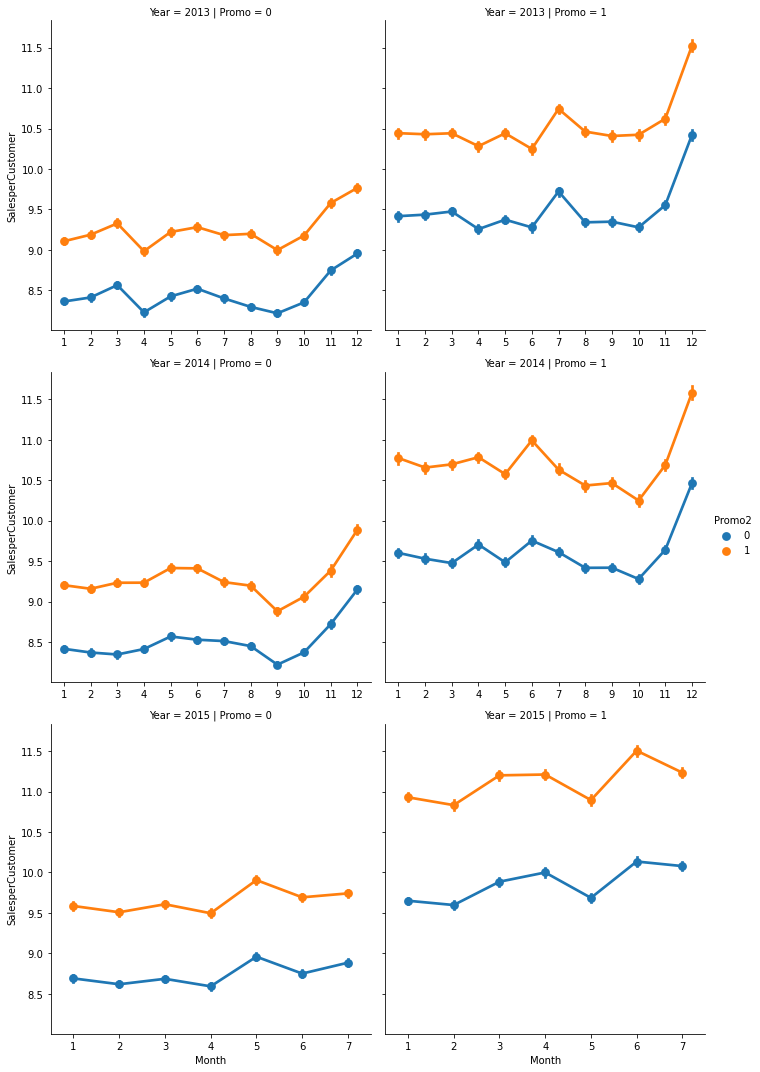

In [ ]:
sns.factorplot(data = df_trim, x ="Month", y = "SalesperCustomer", 
               col = 'Promo', 
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

In [ ]:
# Drop Column
df_trim.drop(["Open","Date"], axis=1, inplace=True)

In [ ]:
# Save to CSV
df.to_csv('data_merged_final.csv', index=False)


In [ ]:
# PLEASE USE * df_trim * dataset

In [ ]:
df_trim.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Day                            int64
Month                          int64
Year                           int64
SalesperCustomer             float64
dtype: object

In [ ]:
df_trim.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Month                             0
Year                              0
SalesperCustomer             172869
dtype: int64

In [ ]:
df_trim

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,SalesperCustomer
0,1,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015,9.482883
1,2,5,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,9.702400
2,3,5,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,10.126675
3,4,5,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015,9.342457
4,5,5,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013,NaN
1017205,1112,2,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1,1,2013,NaN
1017206,1113,2,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013,NaN
1017207,1114,2,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013,NaN


In [ ]:
df_trim['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [ ]:
df_trim['Promo2SinceWeek'].fillna(0,inplace = True)
df_trim['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode()[0],inplace = True)
df_trim['PromoInterval'].fillna(store['PromoInterval'].mode()[0],inplace = True)

In [ ]:
df_trim['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
df_trim['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0],inplace = True)
df_trim['CompetitionDistance'].fillna(store['CompetitionDistance'].max(),inplace = True)
df_trim['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0],inplace = True)

In [ ]:
df_trim['StateHoliday'] = df_trim['StateHoliday'].map({'a':1,'b':2,'c':3,'0':0,0:0})
df_trim['StateHoliday'] = df_trim['StateHoliday'].astype(int)

In [ ]:
df_trim['Assortment'] = df_trim['Assortment'].map({'a':1,'b':2,'c':3})
df_trim['Assortment'] = df_trim['Assortment'].astype(int)

In [ ]:
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
df_trim['PromoInterval'] = df_trim['PromoInterval'].map(map_promo)

In [ ]:
df_trim['StoreType'] = df_trim['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
df_trim['StoreType'] = df_trim['StoreType'].astype(int)

In [ ]:
df_trim.head()


,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,SalesperCustomer
0,1,5,5263,555,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,2011.0,1,31,7,2015,9.482883
1,2,5,6064,625,1,0,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1,31,7,2015,9.702400
2,3,5,8314,821,1,0,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1,31,7,2015,10.126675
3,4,5,13995,1498,1,0,1,3,3,620.0,9.0,2009.0,0,0.0,2011.0,1,31,7,2015,9.342457
4,5,5,4822,559,1,0,1,1,1,29910.0,4.0,2015.0,0,0.0,2011.0,1,31,7,2015,8.626118


In [ ]:
df_trim.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
Day                               0
Month                             0
Year                              0
SalesperCustomer             172869
dtype: int64

## **Model Building**


In [ ]:
df_trim['SalesperCustomer'].fillna((df_trim['SalesperCustomer'].mean()), inplace=True)



In [ ]:
target_col_name = 'Sales'
input_cols_names = df_trim.columns.drop(target_col_name)

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
train_x, test_x, train_y, test_y_open = train_test_split(df_trim[input_cols_names],
                                                   df_trim[target_col_name],
                                                   test_size=0.2,
                                                   random_state=1)
train_x.shape, test_x.shape, train_y.shape, test_y_open.shape

((813767, 19), (203442, 19), (813767,), (203442,))

In [ ]:
y_test_closed = np.zeros(df_trim.shape[0])
y_test = np.append(test_y_open, y_test_closed)

### Linear Regression Model

r2_score: 0.9819960130706101
Mean absolute error: 87.36
Root mean squared error:  358.1378341099576


Text(0, 0.5, 'Predicted values')

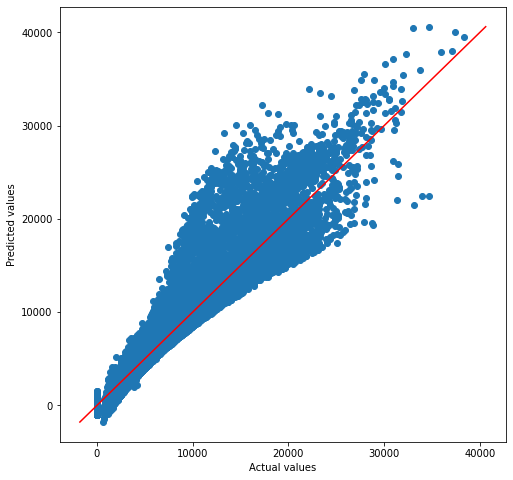

In [ ]:
%%time
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x,train_y)

prediction_open = model.predict(test_x)
prediction_closed = np.zeros(df_trim.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


### SGC Regression Model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


r2_score: -3.8617673570029074e+24
Mean absolute error: 1145072897169167.50
Root mean squared error:  5245162069432446.0
CPU times: user 29.6 s, sys: 137 ms, total: 29.8 s
Wall time: 30.3 s


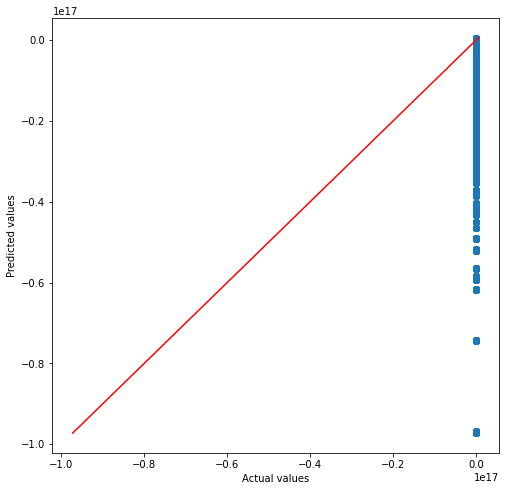

In [ ]:
%%time
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(train_x,train_y)

prediction_open = model.predict(test_x)
prediction_closed = np.zeros(df_trim.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### Decision Tree Regression 

r2_score: 0.9999328227581281
Mean absolute error: 2.20
Root mean squared error:  21.876454759933445
CPU times: user 11.9 s, sys: 24.9 ms, total: 11.9 s
Wall time: 11.8 s


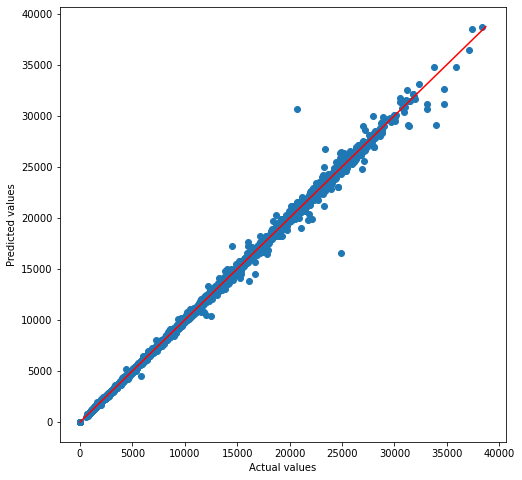

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=1000)

model.fit(train_x,train_y)

prediction_open = model.predict(test_x)
prediction_closed = np.zeros(df_trim.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### Random Forest Regression

r2_score: 0.9999723090405173
Mean absolute error: 0.73
Root mean squared error:  14.045424203901737
CPU times: user 8min 55s, sys: 1.07 s, total: 8min 56s
Wall time: 8min 54s


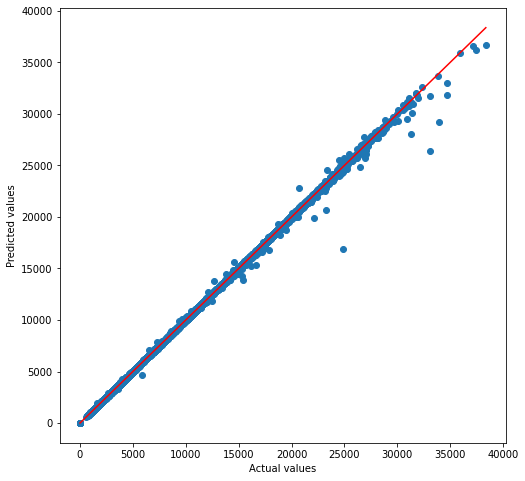

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=75)
model.fit(train_x,train_y)

prediction_open = model.predict(test_x)
prediction_closed = np.zeros(df_trim.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


### Sales

* Some exceptions (the outliers) in the boxplot had to be checked to see if it's wrong inputted data but it turns out this big amount of sales on certain days is explained by either promotional purposes,the type of the store being big and popular or just not having near enough competition.

* An important metric to always check when looking at a distribution is how the mean compares to the median and how close are they from each other. As we see here a mean of 6955 versus 6369 in median is a very good sign that there are no extravagant values affecting the general distribution of Sales.

### Customers

* We can see similair patterns with the customers column and the Sales column. In general, the more customers you have in a store, the higher your sales for the day.

* We see that on a specific day there was a huge amount of customers in a store,this was due to a big promotion going on.

* We observe a right skewness in both distributions.

### Store Type

* We can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

* When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers. One assumption could be that if B has only 17 stores but such a high amount of average sales and customers that it is likely hyper Rossman branches whereas A would be smaller in size but much more present.

* Surprisingly it is StoreType D who has the highest average spending per Customer, this is probably explained by an average competition distance higher than ther rest which means each customer will buy more since he knows there isn't a lot of similair shops around.


### Assortments

* We can clearly see here that most of the stores have either a assortment type or c assortment type.

* Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.


### Promotions

* We see the dramatic change when we compare having promotion Promo=1 to not having promotion Promo=0 and can conclude that a store that have promotion on a given day changes its amount of sales considerably.

* But Surprisingly, when we check more granularly at the Promo2 variable (indicating a contunious promotion blue vs orange) we see that in general when there is no consecutive promotion stores tend to sell more then with consecutive promotion.

* If we look over the years,there is a slight increase Year over Year but we don't see any major change from 2013 to 2015 and we actually see a very similair pattern in the months over the years with major spikes first around Easter period in March and April then in Summer in May,June and July and then finally around the Christmas period in November and December.

### Competition Distance

* As we can see here, like i thought, the stores that are the furthest have the highest average sales and number of customers.

* This doesn't mean automatically that the furthest the better, but it does shed light on the fact that when there are no competition nearby, stores tend to sell more and have more customers because there are almost a monopoly in this region. 